In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(47)

In [3]:
def noise(mu, sigma, K):
    return np.random.normal(mu, sigma, K)

In [4]:
def normal_pdf(x, mu, sigma):
    return 1 / (np.sqrt(2 * np.pi * sigma * sigma)) * np.exp(-0.5 * (x - mu) * (x - mu) / (sigma * sigma))

In [5]:
def f_0(r, X_):
    C = np.ones(len(X_))
    return r * C

def f_1(q, r, X_):
    return q*X_ + r

def f_2(p, q, r, X_):
    return p*X_**2 + q*X_ + r

In [6]:
a, b, c = 1000000, 10000, 1

X = np.random.uniform(0, 5, 3)
mean = 0
sigma = 1
# X = np.array([1, 2, 3])
Y = f_2(a, b, c, X) + noise(mean, sigma, 3)
print("X : ", X)
print("Y : ", Y)

X :  [0.56744236 4.87241547 3.64367317]
Y :  [  327667.58859358 23789156.7340947  13312792.44029866]


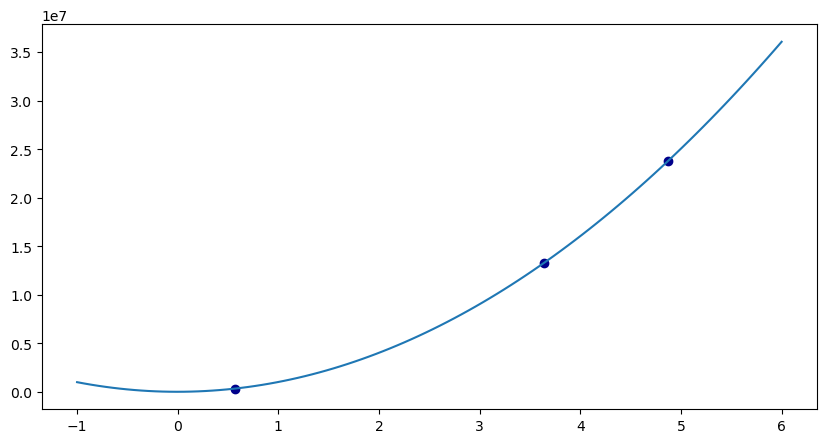

In [7]:
# Creating vectors X and Y
x = np.linspace(-1, 6, 100)
y = f_2(a, b, c, x)
 
fig = plt.figure(figsize = (10, 5))
# Create the plot
plt.plot(x, y)
plt.scatter(X, Y, color = 'darkblue')
 
plt.show()

In [8]:
N = 1000

In [9]:
def fit_f0(X_, Y_):
    # return np.sum(Y_) / 3
    return np.polyfit(X_, Y_, 0)

def g_bar_0():
    c_avg = 0

    for _ in range(N):
        X_i = np.random.uniform(0, 5, 3)
        n_ = noise(mean, sigma, 3)
        Y_i = f_2(a, b, c, X_i) + n_

        c_i = fit_f0(X_i, Y_i)
        prob_n_ = normal_pdf(n_, mean, sigma)

        c_avg += np.prod(prob_n_) * c_i
    
    return c_avg

[1.91198905e+08]


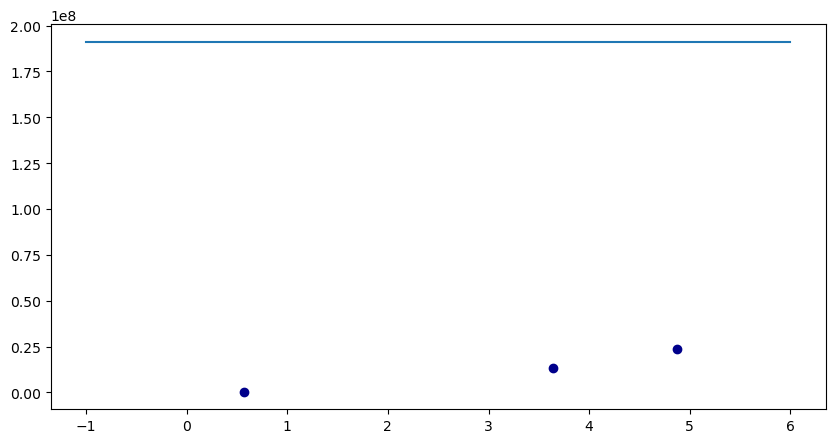

In [10]:
# Creating vectors X and Y
x = np.linspace(-1, 6, 100)
g0_c_ = g_bar_0()

print(g0_c_)

y = f_0(g0_c_, x)
 
fig = plt.figure(figsize = (10, 5))

# Create the plot
plt.plot(x, y)
plt.scatter(X, Y, color = 'darkblue')
 
plt.show()

In [154]:
def fit_f1(X_, Y_):
    # too mathematical just use the library

    return np.polyfit(X_, Y_, 1)

def g_bar_1():
    b_avg, c_avg = 0, 0

    for _ in range(N):
        X_i = np.random.uniform(0, 5, 3)
        n_ = noise(mean, sigma, 3)
        Y_i = f_2(a, b, c, X_i) + n_

        b_i, c_i = fit_f1(X_i, Y_i)
        prob_n_ = normal_pdf(n_, mean, sigma)

        b_avg += np.prod(prob_n_) * b_i
        c_avg += np.prod(prob_n_) * c_i
    
    return b_avg, c_avg

109142833.40198916 -116328426.11782421


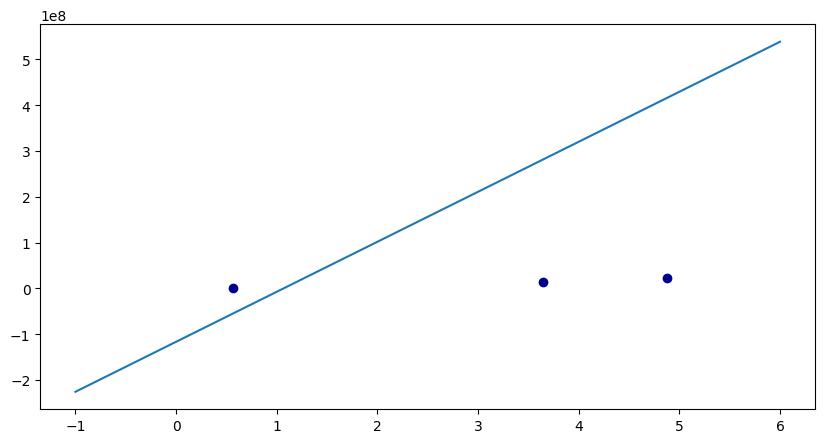

In [155]:
# Creating vectors X and Y
x = np.linspace(-1, 6, 100)
g1_b_, g1_c_ = g_bar_1()

print(g1_b_, g1_c_)

y = f_1(g1_b_, g1_c_, x)
 
fig = plt.figure(figsize = (10, 5))

# Create the plot
plt.plot(x, y)
plt.scatter(X, Y, color = 'darkblue')
 
plt.show()

In [156]:
def fit_f2(X_, Y_):
    # too mathematical just use the library

    return np.polyfit(X_, Y_, 2)

def g_bar_2():
    a_avg, b_avg, c_avg = 0, 0, 0

    for _ in range(N):
        X_i = np.random.uniform(0, 5, 3)
        n_ = noise(mean, sigma, 3)
        Y_i = f_2(a, b, c, X_i) + n_

        a_i, b_i, c_i = fit_f2(X_i, Y_i)
        prob_n_ = normal_pdf(n_, mean, sigma)

        a_avg += np.prod(prob_n_) * a_i
        b_avg += np.prod(prob_n_) * b_i
        c_avg += np.prod(prob_n_) * c_i
    
    return a_avg, b_avg, c_avg

22511606.14655986 225241.12539027177 -78.76845594247528


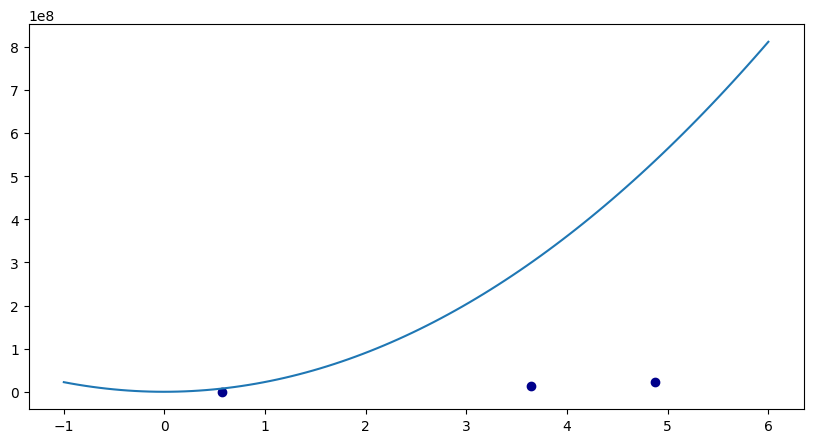

In [157]:
# Creating vectors X and Y
x = np.linspace(-1, 6, 100)
g2_a_, g2_b_, g2_c_ = g_bar_2()

print(g2_a_, g2_b_, g2_c_)

y = f_2(g2_a_, g2_b_, g2_c_, x)
 
fig = plt.figure(figsize = (10, 5))

# Create the plot
plt.plot(x, y)
plt.scatter(X, Y, color = 'darkblue')
 
plt.show()

In [158]:
N = 100

In [159]:
def E_out_0():
    gd0 = fit_f0(X, Y)
    g_bar0 = g0_c_

    fx_g_bar = 0
    gd_gbar = 0
    for i in range(N):
        X_i = np.random.uniform(0, 5, 1)
        
        f_x = f_2(a, b, c, X_i)
        g_bar_x = f_0(g_bar0, X_i)
        gd_x = f_0(gd0, X_i)

        fx_g_bar += (f_x - g_bar_x) * (f_x - g_bar_x)
        gd_gbar += (gd_x - g_bar_x) * (gd_x - g_bar_x)

    fx_g_bar /= N
    gd_gbar /= N
    
    return fx_g_bar + gd_gbar + 1
    

In [160]:
def E_out_1():
    gd1 = fit_f1(X, Y)
    g_bar1 = g1_b_, g1_c_

    fx_g_bar = 0
    gd_gbar = 0
    for i in range(N):
        X_i = np.random.uniform(0, 5, 1)
        
        f_x = f_2(a, b, c, X_i)
        g_bar_x = f_1(g_bar1[0], g_bar1[1], X_i)
        gd_x = f_1(gd1[0], gd1[1], X_i)

        fx_g_bar += (f_x - g_bar_x) * (f_x - g_bar_x)
        gd_gbar += (gd_x - g_bar_x) * (gd_x - g_bar_x)

    fx_g_bar /= N
    gd_gbar /= N
    
    return fx_g_bar + gd_gbar + 1

In [161]:
def E_out_2():
    gd2 = fit_f2(X, Y)
    g_bar2 = g2_a_, g2_b_, g2_c_

    fx_g_bar = 0
    gd_gbar = 0
    for i in range(N):
        X_i = np.random.uniform(0, 5, 1)
        
        f_x = f_2(a, b, c, X_i)
        g_bar_x = f_2(g_bar2[0], g_bar2[1], g_bar2[2], X_i)
        gd_x = f_2(gd2[0], gd2[1], gd2[2], X_i)

        fx_g_bar += (f_x - g_bar_x) * (f_x - g_bar_x)
        gd_gbar += (gd_x - g_bar_x) * (gd_x - g_bar_x)

    fx_g_bar /= N
    gd_gbar /= N
    
    return fx_g_bar + gd_gbar + 1

In [162]:
err0 = E_out_0()
err1 = E_out_1()
err2 = E_out_2()


print(err0)
print(err1)
print(err2)

[6.54713765e+16]
[1.00767198e+17]
[1.19117479e+17]
